In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir('C:\\Users\\gauta\\OneDrive\\Desktop\\Case Study 3 - Insurance Claims Case Study (1)\\Case Study 3 - Insurance Claims Case Study')
os.chdir('C:\\Users\\gauta\\OneDrive\\Desktop\\Case Study 3 - Insurance Claims Case Study (1)\\Case Study 3 - Insurance Claims Case Study')

In [3]:
cust_demographics=pd.read_csv('cust_demographics.csv')

In [4]:
claims=pd.read_csv('claims.csv')

In [5]:
cust_demographics.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [6]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


### Joining the DataFrame 

In [7]:
final_df= pd.merge(left=claims,right=cust_demographics,how='left',left_on='customer_id',right_on='CUST_ID')

### Shape of the data

In [8]:
final_df.shape

(1100, 16)

### Checking the info

In [9]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  CUST_ID              1085 non-null   float64
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

### Removing unwanted columns

In [10]:
final_df.drop('CUST_ID',axis=1,inplace=True)

### Fixing the datatypes of columns

In [11]:
final_df.claim_amount=final_df.claim_amount.str.replace('$','')

In [12]:
final_df.claim_amount=final_df.claim_amount.astype('float')

In [13]:
final_df.claim_date=pd.to_datetime(final_df.claim_date,format='%m/%d/%Y')

In [14]:
final_df.DateOfBirth=pd.to_datetime(final_df.DateOfBirth,format='%d-%b-%y')

### Describing the dataframe

In [15]:
final_df.describe().T

,count,mean,min,25%,50%,75%,max,std
claim_id,1100.0,48838190.052727,26832.0,23815805.0,48539331.0,74074466.0,99775483.0,29188059.567557
customer_id,1100.0,50799544.012727,154557.0,26479506.5,49790067.0,76019781.25,99961993.0,28477268.13232
claim_date,1100,2017-11-26 09:08:30.545454592,2017-01-01 00:00:00,2017-06-04 00:00:00,2017-11-27 00:00:00,2018-05-14 00:00:00,2018-10-30 00:00:00,NaN
claim_amount,1035.0,12442.125121,1000.0,1870.0,2740.0,24300.0,48150.5,13766.391982
total_policy_claims,1090.0,1.591743,1.0,1.0,1.0,2.0,8.0,1.147251
DateOfBirth,1085,2002-10-05 12:20:34.285714176,1969-01-01 00:00:00,1979-05-09 00:00:00,1989-06-11 00:00:00,1999-02-20 00:00:00,2068-12-19 00:00:00,NaN


In [16]:
final_df.describe(include='object').T

,count,unique,top,freq
incident_cause,1100,5,Other causes,290
claim_area,1100,2,Auto,985
police_report,1100,3,No,630
claim_type,1100,3,Material only,663
fraudulent,1100,2,No,846
gender,1085,2,Male,556
State,1085,50,NY,31
Contact,1085,1078,743-569-4783,2
Segment,1085,3,Gold,375


### Checking inconsistency

In [17]:
for i in final_df:
    print(i.upper())
    print(end='\n')
    print(final_df[i].value_counts())
    print(end='\n')

CLAIM_ID

claim_id
54004764    1
43635378    1
78194735    1
94080912    1
92782157    1
           ..
92399694    1
49171996    1
33733739    1
27931854    1
58809728    1
Name: count, Length: 1100, dtype: int64

CUSTOMER_ID

customer_id
85357756    2
30308357    2
47830476    2
19269962    2
21831191    2
           ..
97578924    1
81790039    1
36812323    1
63544225    1
43020876    1
Name: count, Length: 1093, dtype: int64

INCIDENT_CAUSE

incident_cause
Other causes          290
Driver error          262
Other driver error    249
Natural causes        189
Crime                 110
Name: count, dtype: int64

CLAIM_DATE

claim_date
2018-04-04    18
2017-10-17    17
2018-07-07    17
2018-01-13    17
2018-10-03    16
              ..
2018-06-10     6
2018-01-26     6
2017-08-04     6
2017-08-18     6
2018-08-23     5
Name: count, Length: 100, dtype: int64

CLAIM_AREA

claim_area
Auto    985
Home    115
Name: count, dtype: int64

POLICE_REPORT

police_report
No         630
Unknown   

### Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [18]:
final_df['Flag'] = np.where(final_df.police_report == 'Unknown',0,1)
final_df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,1
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,1
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,1
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaT,NaN,NaN,NaN,1
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaT,NaN,NaN,NaN,1
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaT,NaN,NaN,NaN,1
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaT,NaN,NaN,NaN,0


### One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column

In [19]:
final_df.duplicated().sum()

0

In [20]:
final_df.drop_duplicates(subset='customer_id',keep='last')

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,1
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0
6,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,Male,1999-03-02,AR,752-398-2914,Gold,1
7,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,Male,1999-10-25,AK,256-968-9172,Silver,1
8,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,Male,1993-10-12,ID,142-324-7481,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,2017-06-11,Auto,No,Material only,3059.0,4.0,Yes,NaN,NaT,NaN,NaN,NaN,1
1096,10247193,14818669,Natural causes,2018-03-14,Auto,No,Material only,1520.0,2.0,No,NaN,NaT,NaN,NaN,NaN,1
1097,79807493,85322831,Other driver error,2018-02-09,Auto,No,Material and injury,23575.0,2.0,Yes,NaN,NaT,NaN,NaN,NaN,1
1098,69299345,73449366,Other causes,2018-03-21,Auto,Unknown,Material and injury,25120.0,1.0,No,NaN,NaT,NaN,NaN,NaN,0


### Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [21]:
final_df.isnull().sum()/len(final_df)*100

claim_id               0.000000
customer_id            0.000000
incident_cause         0.000000
claim_date             0.000000
claim_area             0.000000
police_report          0.000000
claim_type             0.000000
claim_amount           5.909091
total_policy_claims    0.909091
fraudulent             0.000000
gender                 1.363636
DateOfBirth            1.363636
State                  1.363636
Contact                1.363636
Segment                1.363636
Flag                   0.000000
dtype: float64

One column i.e claim_amount   missing value is more than 5%, so will be imputing with the mean

<Axes: xlabel='claim_amount'>

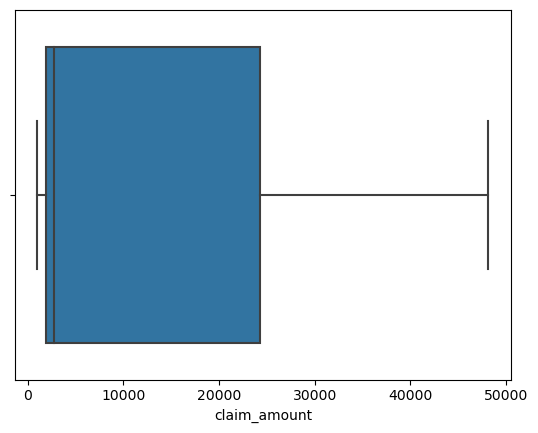

In [22]:
sns.boxplot(data=final_df,x='claim_amount')

There are no outliers so imputing the value with mean

In [23]:
final_df.claim_amount.mean()

12442.125120772947

In [24]:
final_df.claim_amount=final_df.claim_amount.fillna(final_df.claim_amount.mean())

Imputed the missing value with mean 

### Removing the missing values less than 5 % 

In [25]:
final_df.dropna(inplace=True)

### Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria  Children < 18 Youth 18-30 Adult 30-60 Senior > 60

In [26]:
curr_year=pd.to_datetime('today').year

In [110]:
dob_year = pd.DatetimeIndex(final_df['DateOfBirth']).year 

In [28]:
final_df['Age']=curr_year-dob_year

In [29]:
final_df.loc[(final_df.Age < 18),'AgeGroup'] = 'Children'
final_df.loc[(final_df.Age >=18) & (final_df.Age <30),'AgeGroup'] = 'Youth'
final_df.loc[(final_df.Age >=30) & (final_df.Age <60),'AgeGroup'] = 'Adult'
final_df.loc[(final_df.Age >=60),'AgeGroup'] = 'Senior'

final_df

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Flag,Age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,1,45,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0,54,Adult
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,1,40,Adult
3,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,1,38,Adult
4,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,Male,1977-05-13,NV,956-871-8691,Gold,1,47,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,1,43,Adult
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver,1,28,Youth
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,1,34,Adult
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,2064-10-22,LA,469-345-5617,Silver,1,-40,Children


### What is the average amount claimed by the customers from various segments?

In [30]:
final_df[['Segment','claim_amount']].groupby(by=['Segment']).mean()

,claim_amount
Segment,
Gold,12707.126701
Platinum,12399.703824
Silver,12235.485197


### What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [31]:
from datetime import date,timedelta 
days_before = (date.today()-timedelta(days=20)).isoformat()

### How many adults from TX, DE and AK claimed insurance for driver  related issues and causes?

In [32]:
count = final_df.loc[((final_df.State == 'TX') | (final_df.State == 'DE') | (final_df.State == 'AK')) & (final_df.incident_cause == 'Driver error') & (final_df.AgeGroup == 'Adult'),['AgeGroup']].count()
count

AgeGroup    15
dtype: int64

### Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage onthe pie chart.

In [55]:
Claim_Df_gender=final_df[['Segment','claim_amount','gender']].groupby(by=['Segment','gender']).sum().astype('int')

<Figure size 600x700 with 0 Axes>

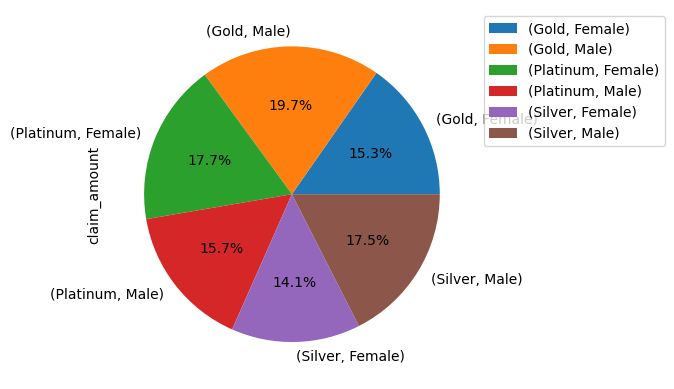

In [65]:
plt.figure(figsize=(6,7))
Claim_Df_gender.plot(kind='pie',subplots=True,autopct='%.1f%%')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')



### Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [68]:
driver_error=final_df[final_df.incident_cause=='Driver error']

In [72]:
driver_errors_bar=driver_error[['incident_cause','gender']].groupby(by=['gender']).count()

array([<Axes: title={'center': 'incident_cause'}, xlabel='gender'>],
      dtype=object)

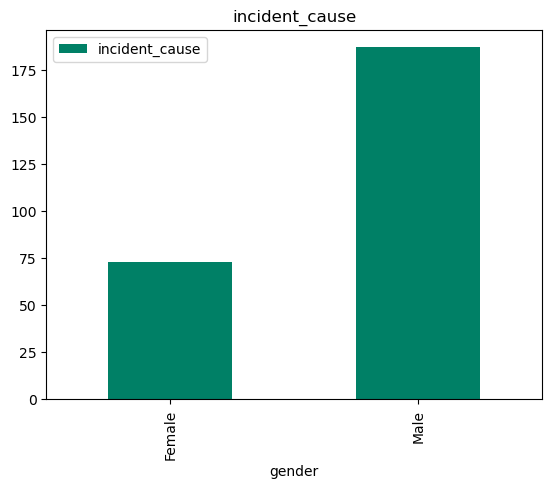

In [89]:
driver_errors_bar.plot(kind='bar',subplots=True,colormap='summer')

### Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [96]:
fraudulent=final_df[['fraudulent','AgeGroup']].groupby(by=['AgeGroup']).count()

array([<Axes: title={'center': 'fraudulent'}, ylabel='AgeGroup'>],
      dtype=object)

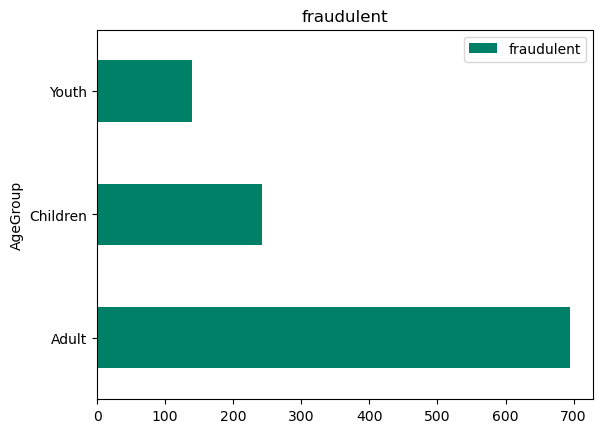

In [101]:
fraudulent.plot(kind='barh',subplots=True,colormap='summer')

### Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [112]:
final_df['claim_month'] = pd.DatetimeIndex(final_df['claim_date']).month

In [118]:
monthly_claim=final_df[['claim_month','claim_amount']].groupby(by=['claim_month']).sum().astype('int')

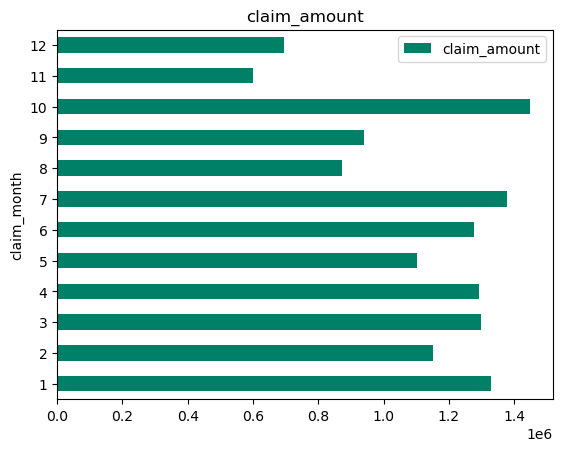

In [123]:
monthly_claim.plot(kind='barh',subplots=True,colormap='summer')
plt.show()

### What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [127]:
No_fraudulent=final_df[final_df.fraudulent=='No']

In [132]:
No_fraudulent_chart=No_fraudulent[['claim_amount','gender','AgeGroup']].groupby(by=['gender','AgeGroup']).mean()

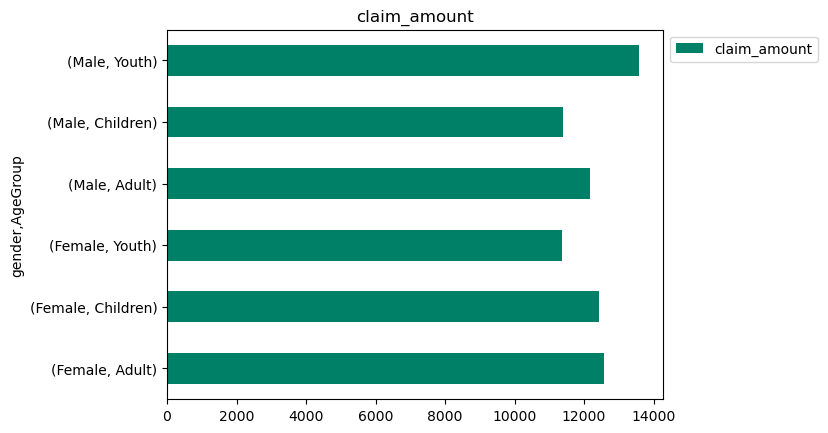

In [137]:
No_fraudulent_chart.plot(kind='barh',subplots=True,colormap='summer')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()


In [138]:
Yes_fraudulent=final_df[final_df.fraudulent=='Yes']

In [139]:
Yes_fraudulent_Chart=Yes_fraudulent[['claim_amount','gender','AgeGroup']].groupby(by=['gender','AgeGroup']).mean()

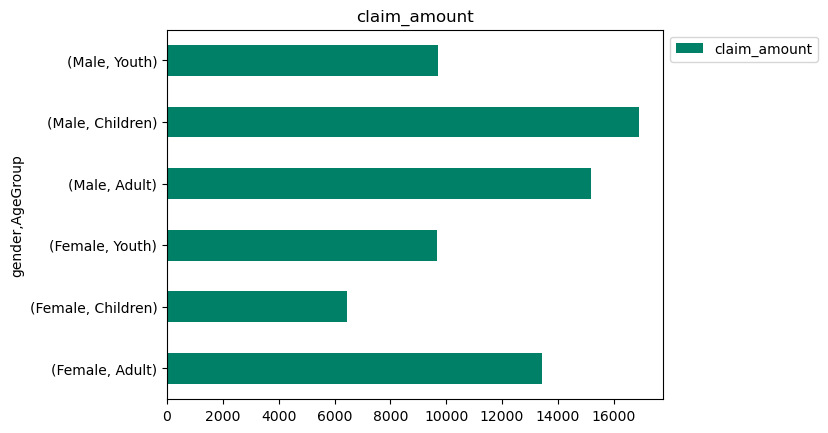

In [140]:
Yes_fraudulent_Chart.plot(kind='barh',subplots=True,colormap='summer')
plt.legend(bbox_to_anchor=(1,1),loc='upper left')
plt.show()


# Hypothesis testing

### Is there any similarity in the amount claimed by males and females?

In [ ]:
Ho: 